⏳ Đang tải dữ liệu...

1. ĐÁNH GIÁ SỐ LƯỢNG TỔNG QUÁT
- Số dòng ban đầu cào được: 31,176
- Số dòng sau khi làm sạch: 20,817
- Tỉ lệ giữ lại: 66.8%

2. ĐÁNH GIÁ ĐỘ PHỦ (ĐÃ ẨN: Cần Giờ, Củ Chi)
- Số quận đang hiển thị: 20
- Quận nhiều tin nhất: Thành phố Thủ Đức (2733 tin)
- Quận ít tin nhất: Nhà Bè (277 tin)


C:\Users\PHUCDAI\AppData\Local\Temp\ipykernel_21396\3567993997.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


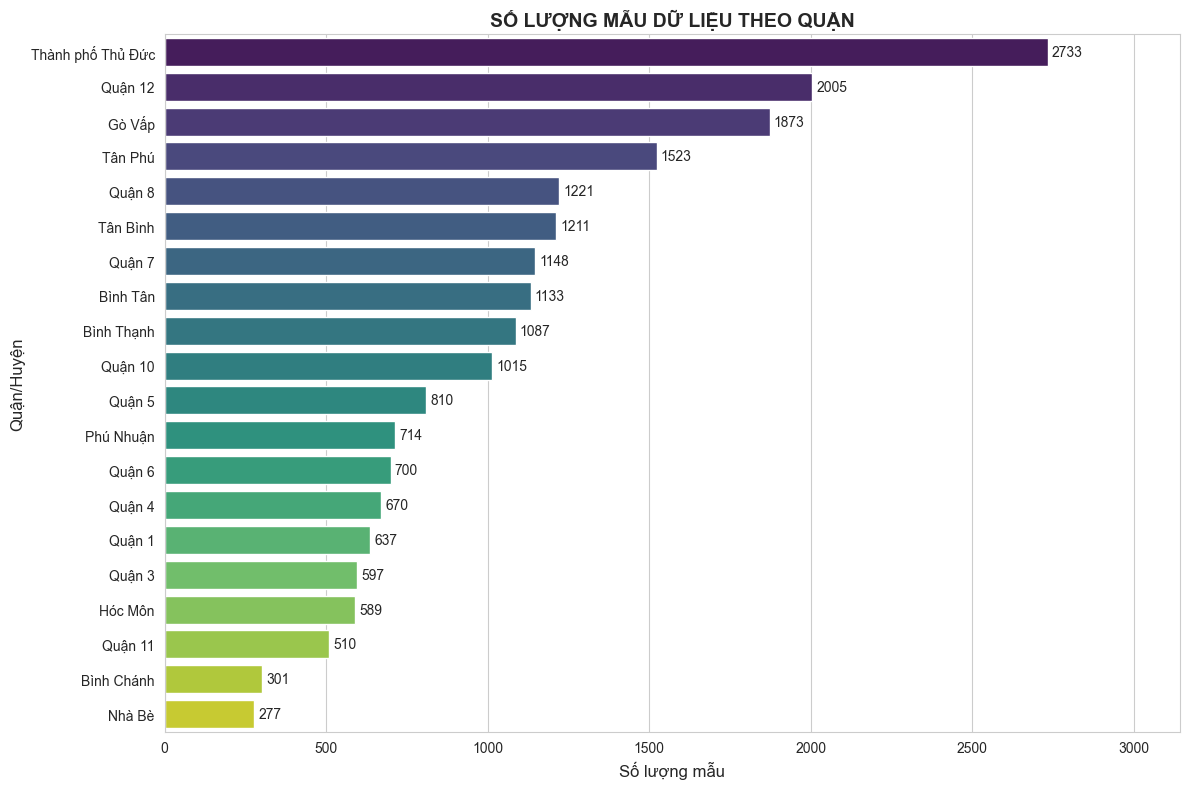


3. ĐÁNH GIÁ LOGIC TOÀN CỤC (CORRELATION)
- Hệ số tương quan giữa Diện tích & Tổng giá: 0.21
-> Đánh giá: Tương quan yếu hoặc trung bình (do ảnh hưởng vị trí).


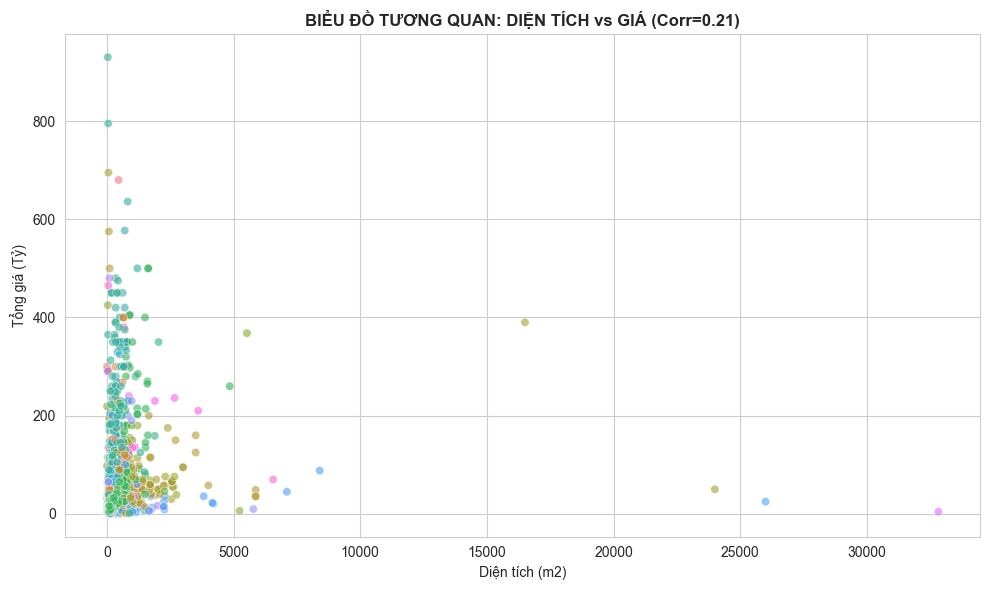


✅ ĐÃ HOÀN THÀNH QUY TRÌNH ĐÁNH GIÁ.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CẤU HÌNH ---
FILE_CLEAN = 'DataCrawLoc/batdongsan_data_CLEAN_FULL_CALCULATED_CAITIEN.csv'
FILE_FINAL = r'c:\Workspace\python\Done-p3.csv'

# DANH SÁCH QUẬN MUỐN ẨN KHỎI BIỂU ĐỒ THỐNG KÊ
exclude_districts = ["Cần Giờ", "Củ Chi"]

try:
    print("⏳ Đang tải dữ liệu...")
    df_raw = pd.read_csv(FILE_CLEAN)
    df = pd.read_csv(FILE_FINAL)

    # 1. KIỂM TRA SỐ LƯỢNG (Vẫn dùng toàn bộ data gốc để báo cáo)
    print("\n" + "="*40)
    print("1. ĐÁNH GIÁ SỐ LƯỢNG TỔNG QUÁT")
    print("="*40)
    print(f"- Số dòng ban đầu cào được: {len(df_raw):,}")
    print(f"- Số dòng sau khi làm sạch: {len(df):,}")
    print(f"- Tỉ lệ giữ lại: {(len(df)/len(df_raw)*100):.1f}%")

    # 2. KIỂM TRA ĐỘ PHỦ ĐỊA LÝ (Đã lọc bỏ Cần Giờ, Củ Chi để vẽ)
    print("\n" + "="*40)
    print("2. ĐÁNH GIÁ ĐỘ PHỦ (ĐÃ ẨN: " + ", ".join(exclude_districts) + ")")
    print("="*40)

    # --- BƯỚC QUAN TRỌNG: TẠO DATA RIÊNG ĐỂ VẼ ---
    # Dấu ~ nghĩa là "KHÔNG NẰM TRONG" danh sách loại trừ
    df_viz = df[~df['District'].isin(exclude_districts)]

    dist_counts = df_viz['District'].value_counts()

    print(f"- Số quận đang hiển thị: {len(dist_counts)}")
    print(f"- Quận nhiều tin nhất: {dist_counts.index[0]} ({dist_counts.iloc[0]} tin)")
    print(f"- Quận ít tin nhất: {dist_counts.index[-1]} ({dist_counts.iloc[-1]} tin)")

    # Vẽ biểu đồ độ phủ dựa trên df_viz (đã lọc)
    plt.figure(figsize=(12, 8))

    ax = sns.countplot(
        data=df_viz,  # <--- Dùng data đã lọc
        y='District',
        order=dist_counts.index,
        palette='viridis'
    )

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

    plt.title('SỐ LƯỢNG MẪU DỮ LIỆU THEO QUẬN', fontweight='bold', fontsize=14)
    plt.xlabel('Số lượng mẫu', fontsize=12)
    plt.ylabel('Quận/Huyện', fontsize=12)

    # Tính lại giới hạn trục X dựa trên data mới
    max_count = dist_counts.iloc[0]
    plt.xlim(right=max_count * 1.15)

    plt.tight_layout()
    plt.show()

    # 3. KIỂM TRA LOGIC (Vẫn dùng df gốc đầy đủ để tính toán chính xác toàn cục)
    print("\n" + "="*40)
    print("3. ĐÁNH GIÁ LOGIC TOÀN CỤC (CORRELATION)")
    print("="*40)
    # Lưu ý: Ở đây tôi vẫn dùng 'df' (data gốc) để tính tương quan chung
    # Nếu bạn muốn tính tương quan mà bỏ 2 quận kia luôn thì đổi thành 'df_viz' nhé.
    corr = df['Area_m2'].corr(df['Price_Billion'])

    print(f"- Hệ số tương quan giữa Diện tích & Tổng giá: {corr:.2f}")
    if corr > 0.5:
        print("-> Đánh giá: Tương quan dương mạnh. Dữ liệu hợp lý.")
    else:
        print("-> Đánh giá: Tương quan yếu hoặc trung bình (do ảnh hưởng vị trí).")

    # Vẽ biểu đồ tương quan
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Area_m2', y='Price_Billion', hue='District', alpha=0.6, legend=False)
    plt.title(f'BIỂU ĐỒ TƯƠNG QUAN: DIỆN TÍCH vs GIÁ (Corr={corr:.2f})', fontweight='bold')
    plt.xlabel('Diện tích (m2)')
    plt.ylabel('Tổng giá (Tỷ)')
    plt.tight_layout()
    plt.show()

    print("\n✅ ĐÃ HOÀN THÀNH QUY TRÌNH ĐÁNH GIÁ.")

except Exception as e:
    print(f"Lỗi: {e}")